In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dns.name
import json
import os
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

### DNS HTTPS RR Adoption Rate: apex and www
We read apex and www DNS HTTPS RR records and count its adoption rate.

If you want to reprocess, please run `../src/scpt_httpsrradoption.py`.

In [6]:
df_httpsrr = pd.read_csv("../data/plotting/alldom/adoption_apex_httpsrr.csv")
df_httpsrr_www = pd.read_csv("../data/plotting/alldom/adoption_www_httpsrr.csv")

In [8]:
df_httpsrr['perc'] = df_httpsrr['num_httpsrr'].apply(lambda x: x / 10000)
df_httpsrr_www['perc'] = df_httpsrr_www['num_httpsrr'].apply(lambda x: x / 10000)
df_httpsrr['datetime'] = df_httpsrr['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df_httpsrr_www['datetime'] = df_httpsrr_www['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

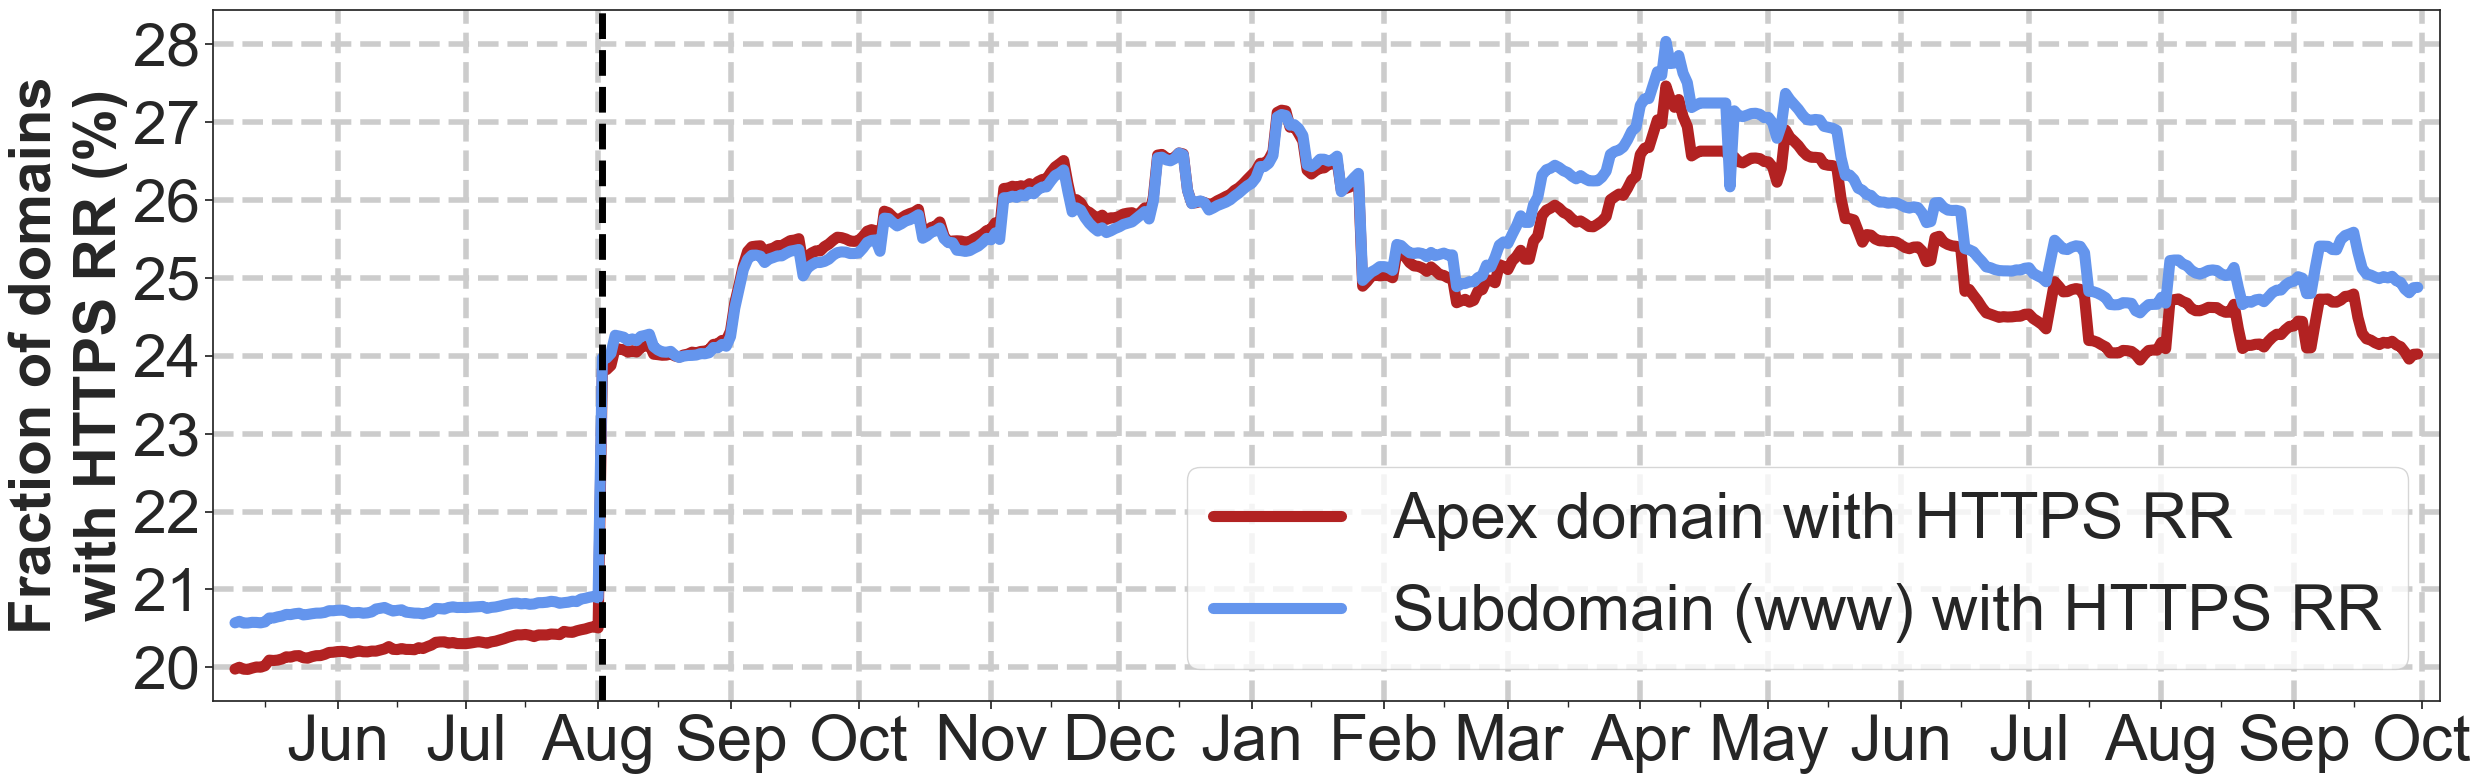

In [9]:
fig = plt.figure(figsize=(25,8))
sns.set(style="ticks")
ax = sns.lineplot(data=df_httpsrr, x="datetime", y="perc", linewidth=8, color='firebrick', \
                  label='Apex domain with HTTPS RR')
ax2 = sns.lineplot(data=df_httpsrr_www, x="datetime", y="perc", linewidth=8, color='cornflowerblue', \
                   label='Subdomain (www) with HTTPS RR')

ax.grid(True, linestyle='--', linewidth=4)

ax.axvline(x=datetime.strptime("2023-08-02", "%Y-%m-%d"), color="black", linestyle="dashed", linewidth=5)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax.set_xlabel('')
plt.xticks(fontsize=46)
plt.yticks(fontsize=44)
plt.ylabel("Fraction of domains\nwith HTTPS RR (%)", fontsize=42, labelpad=3, fontweight='bold')
plt.margins(x=.01)

plt.legend(fontsize=46, loc="lower right")
fig.tight_layout()
#fig.savefig('../figures/alldom_httpsrr.png', dpi=200)
plt.show()